In [93]:
import numpy as np
from math import *
import matplotlib.pyplot as plt


In [94]:
xmax=5.0 #Max length
nx=100 #No. of divisions
dx=xmax/(nx-1) #Length subdivision
nlamda=40 #No. of points per wavelength
lamda=nlamda*dx #Wavelength
k=2*pi/lamda #Wavenumber
x=np.linspace(0,xmax,nx) #Array of position
f=np.sin(k*x) #Definiton of the function

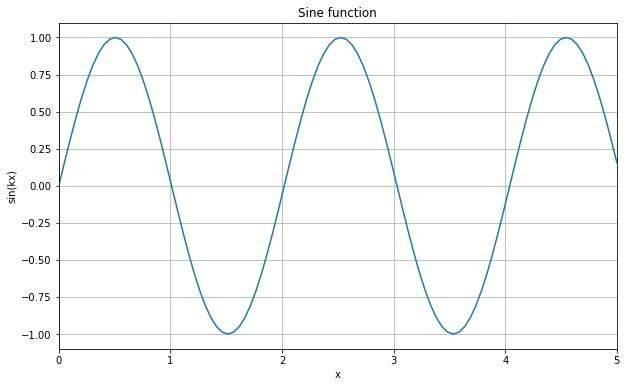

In [95]:
plt.figure(figsize=(10,6)) 
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('sin(kx)')
plt.title('Sine function')
plt.xlim(0,xmax)
plt.grid()
plt.show()

In [96]:
#Finite difference approx for derivative
fdashn=np.zeros(nx) #initialization of numerical derivative
for i in range (1,nx-1):
    fdashn[i]=(f[i+1]-f[i-1])/(2*dx) #Central difference scheme
#Analytical solution
fdasha=np.zeros(nx) #initialization of analytical derivative
fdasha=k*np.cos(k*x)
fdasha[0]=0
fdasha[nx-1]=0 #boundaries are kept 0 as numerical solution is inaccurate at boundaries
#error
error=np.zeros(nx) 
error=fdashn-fdasha
#rms error
rms=np.sqrt(np.mean(fdashn-fdasha)**2)

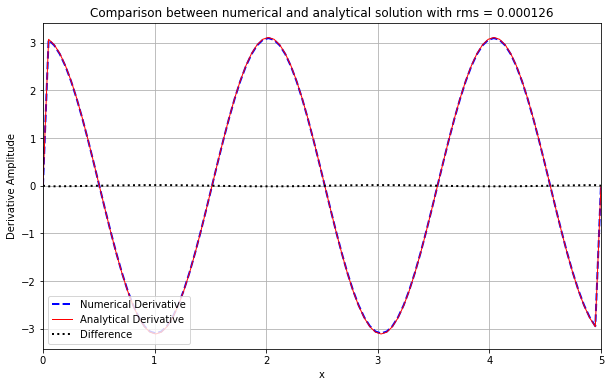

In [97]:
plt.figure(figsize=(10,6))
plt.plot(x,fdashn,label="Numerical Derivative",color="blue",linewidth=2,ls='--')
plt.plot(x,fdasha,label="Analytical Derivative",color="red",linewidth=1,ls='-')
plt.plot(x,error,label="Difference",color="black",linewidth=2,ls=':')
plt.xlabel('x')
plt.ylabel('Derivative Amplitude')
plt.xlim(0,xmax)
plt.title('Comparison between numerical and analytical solution with rms = %.6f' % (rms))
plt.legend(loc='lower left')
plt.grid()
plt.show()

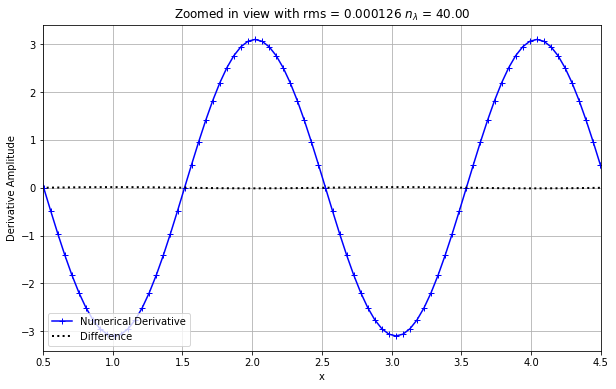

In [98]:
#Magnified view to check impact of decreasingnumber of points per wavelength
plt.figure(figsize=(10,6))
plt.plot(x,fdashn,label="Numerical Derivative",color="blue",marker='+')
#plt.plot(x,fdasha,label="Analytical Derivative",color="red",linewidth=1,ls='-')
plt.plot(x,error,label="Difference",color="black",linewidth=2,ls=':')
plt.xlabel('x')
plt.ylabel('Derivative Amplitude')
plt.xlim(xmax/2-2,xmax/2+2)
plt.title('Zoomed in view with rms = %.6f $n_\lambda$ = %.2f' % (rms,nlamda))
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [99]:
#Checking the variation of error with the increase in number of points per wavelength
nmin=3 #Min no. of points per lambda
nmax=40 #Max number of points per lambda
j=0 #counter variable
fdashmidn=np.zeros(nmax-nmin+1) #Initializing f numerical derivative at mid point
fdashmida=np.zeros(nmax-nmin+1) #Initializing f analytical derivative at mid point
err=np.zeros(nmax-nmin+1) #Initializing difference at mid point
nlam=np.zeros(nmax-nmin+1) #Initializing no. of points per wavelength
for n in range(nmin,nmax+1): #loop from min to max
    lamda=n*dx 
    k=2*pi/n
    f=np.sin(k*x) #Function calculation
    loc=int(xmax/(2.0*dx))
    fdashmidn[j]=(f[loc+1]-f[loc-1])/(2*dx) #Midpoint numerical derivative calculation 
    nlam[j]=n #Store value of no. of points per wavelength for xaxis of plot
    fdashmida[j]=k*np.cos(k*loc*dx) #Midpoint analytical derivative calculation 
    err[j]=(fdashmidn[j]-fdashmida[j])**2/fdashmida[j]**2 * 100 #RMS Error
    j=j+1

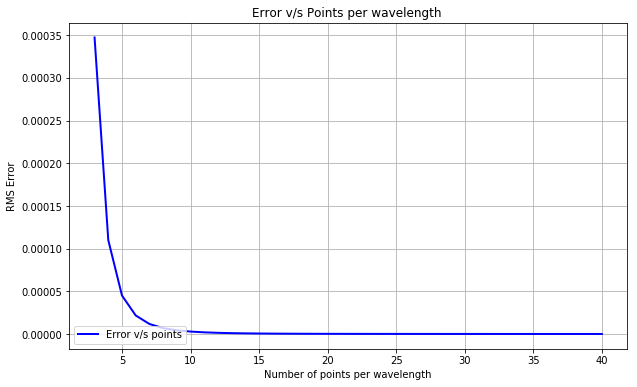

In [102]:
plt.figure(figsize=(10,6))
plt.plot(nlam,err,label="Error v/s points",color="blue",linewidth=2)
plt.xlabel('Number of points per wavelength')
plt.ylabel('RMS Error')
plt.legend(loc='lower left')
plt.title('Error v/s Points per wavelength ')
plt.grid()
plt.show()